In [23]:
import numpy as np

import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.risks as risks
import mlgrad.cls as cls
import mlgrad.plots as plots

from pprint import pprint

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X, Y = digits.data, digits.target
print(X.shape)
#scaler = MinMaxScaler()
#Xt = scaler.fit_transform(X)
Xt = X / 16.

(1797, 64)


In [3]:
X17 = Xt[(Y == 1)|(Y==7)]
Y17 = Y[(Y == 1)|(Y==7)]
Y17[Y17 == 1] = 1
Y17[Y17 == 7] = -1
Y17 = Y17.astype('d')
print(Y17)

[ 1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.
  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.
 -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.
 -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.
  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.
 -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.
 -1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.
 -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.
 -1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1.
  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.
 -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.
  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1

In [18]:
lm = models.LinearModel(64)
lm.allocate()
lm.init_param()

In [19]:
alg = cls.classification_as_regr(X17, Y17, lm,
                             lossfunc=loss.MarginLoss(funcs.Hinge(1.0)),
                             # regnorm=funcs2.SquareNorm(), tau=0.001,
                             h=0.1)
param = np.asarray(lm.param)
lm.param[:] = param / np.sqrt(param @ param)

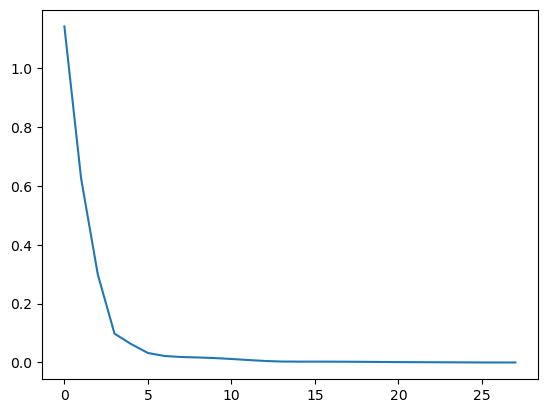

In [20]:
plt.plot(alg.lvals)
plt.show()

In [21]:
accuracy_score(Y17, np.sign(lm.evaluate_all(X17)))

1.0

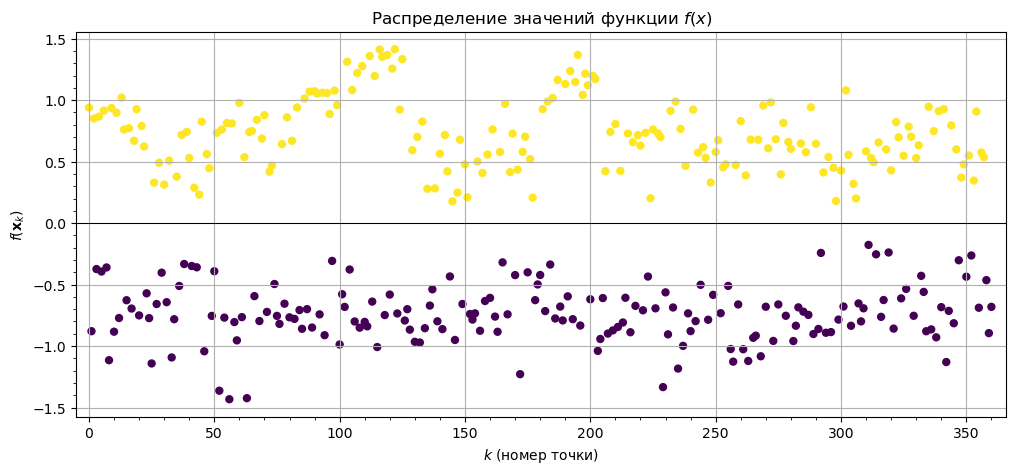

In [22]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(lm, X17, Y17)
plt.show()

In [ ]:
n_input = 64
n_hidden = 20
body = models.FFNetworkModel()
body.add(models.LinearLayer(n_input, n_hidden))
body.add(models.ScaleLayer(funcs.Sigmoidal(3.0), n_hidden))
head = models.LinearModel(n_hidden)
nnmod = models.FFNetworkFuncModel(head, body)

In [ ]:
nnmod.allocate()
nnmod.init_param()
# print(nnmod.param.base)

In [ ]:
alg = cls.classification_as_regr(X17, Y17, nnmod,
                             lossfunc=loss.MarginLoss(funcs.Hinge(1.0)),
                             # regnorm=funcs2.SquareNorm(), tau=0.001,
                             h=0.001)

In [ ]:
plt.plot(alg.lvals)
plt.show()

In [ ]:
accuracy_score(Y17, np.sign(nnmod.evaluate_all(X17)))

In [ ]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(nnmod, X17, Y17)
plt.show()